## Imports

In [100]:
# Pandas is an open source data analysis and manipulation tool
import pandas as pd
from pandas.api.types import CategoricalDtype
# library to create visualizations
import seaborn as sns

# library to create visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as md

#from statsmodels.tsa.stattools import adfuller

import itertools

import nltk
from nltk.corpus import stopwords
import time

## Load DataFrame

In [101]:
path = "C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/DataFrames/"

# load unexploded
path_news = "All_news_articles.csv"
News_DataFrame = pd.read_csv(path+path_news, index_col=None,header=0)
News_DataFrame["Date_Info"] = pd.to_datetime(News_DataFrame["Date_Info"], format='%Y-%m-%d')

# load exploded
fileName_exploded ="All_news_articles_exploded.csv"
News_DataFrame_exploded = pd.read_csv(path+fileName_exploded, index_col=None,header=0)
News_DataFrame_exploded["Date_Info"] = pd.to_datetime(News_DataFrame_exploded["Date_Info"], format='%Y-%m-%d')

# Not exploded
# Spiegel
Spiegel_DataFrame = News_DataFrame.loc[News_DataFrame["News_page"] == "Spiegel"]
# Sueddeutsche
Sueddeutsche_DataFrame = News_DataFrame.loc[News_DataFrame["News_page"] == "Sueddeutsche"]
# Bild
Bild_DataFrame = News_DataFrame.loc[News_DataFrame["News_page"] == "Bild"]

# Exploded
# Spiegel
Spiegel_DataFrame_exploded = News_DataFrame_exploded.loc[News_DataFrame_exploded["News_page"] == "Spiegel"]
# Sueddeutsche
Sueddeutsche_DataFrame_exploded = News_DataFrame_exploded.loc[News_DataFrame_exploded["News_page"] == "Sueddeutsche"]
# Bild
Bild_DataFrame_exploded = News_DataFrame_exploded.loc[News_DataFrame_exploded["News_page"] == "Bild"]

C:\Users\Jan\AppData\Local\Temp\ipykernel_17480\4237666986.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  News_DataFrame = pd.read_csv(path+path_news, index_col=None,header=0)
C:\Users\Jan\AppData\Local\Temp\ipykernel_17480\4237666986.py:10: DtypeWarning: Columns (6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  News_DataFrame_exploded = pd.read_csv(path+fileName_exploded, index_col=None,header=0)


# Publishing Analysis

## Ammount of published news

In [102]:
News_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127642 entries, 0 to 127641
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Titel                  127641 non-null  object        
 1   Overline               106808 non-null  object        
 2   Date_Info              127641 non-null  datetime64[ns]
 3   Kategorie              125528 non-null  object        
 4   URL                    127642 non-null  object        
 5   detailed_informations  52002 non-null   object        
 6   bild_plus              30874 non-null   object        
 7   Zugriff_Datum          109060 non-null  float64       
 8   News_page              127642 non-null  object        
 9   Breadcrumb             53458 non-null   object        
 10  author                 14863 non-null   object        
 11  Titel_and_Overline     106808 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)

### Spiegel

In [103]:
Spiegel_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18582 entries, 30874 to 49455
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Titel                  18582 non-null  object        
 1   Overline               0 non-null      object        
 2   Date_Info              18582 non-null  datetime64[ns]
 3   Kategorie              18582 non-null  object        
 4   URL                    18582 non-null  object        
 5   detailed_informations  0 non-null      object        
 6   bild_plus              0 non-null      object        
 7   Zugriff_Datum          0 non-null      float64       
 8   News_page              18582 non-null  object        
 9   Breadcrumb             0 non-null      object        
 10  author                 0 non-null      object        
 11  Titel_and_Overline     0 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usag

## Sueddeutsche

In [104]:
Sueddeutsche_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78186 entries, 49456 to 127641
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Titel                  78186 non-null  object        
 1   Overline               75936 non-null  object        
 2   Date_Info              78186 non-null  datetime64[ns]
 3   Kategorie              78182 non-null  object        
 4   URL                    78186 non-null  object        
 5   detailed_informations  21128 non-null  object        
 6   bild_plus              0 non-null      object        
 7   Zugriff_Datum          78186 non-null  float64       
 8   News_page              78186 non-null  object        
 9   Breadcrumb             53458 non-null  object        
 10  author                 14863 non-null  object        
 11  Titel_and_Overline     75936 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usa

## Bild

In [105]:
Bild_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30874 entries, 0 to 30873
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Titel                  30873 non-null  object        
 1   Overline               30872 non-null  object        
 2   Date_Info              30873 non-null  datetime64[ns]
 3   Kategorie              28764 non-null  object        
 4   URL                    30874 non-null  object        
 5   detailed_informations  30874 non-null  object        
 6   bild_plus              30874 non-null  object        
 7   Zugriff_Datum          30874 non-null  float64       
 8   News_page              30874 non-null  object        
 9   Breadcrumb             0 non-null      object        
 10  author                 0 non-null      object        
 11  Titel_and_Overline     30872 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 3

## Ammount of published news by media house

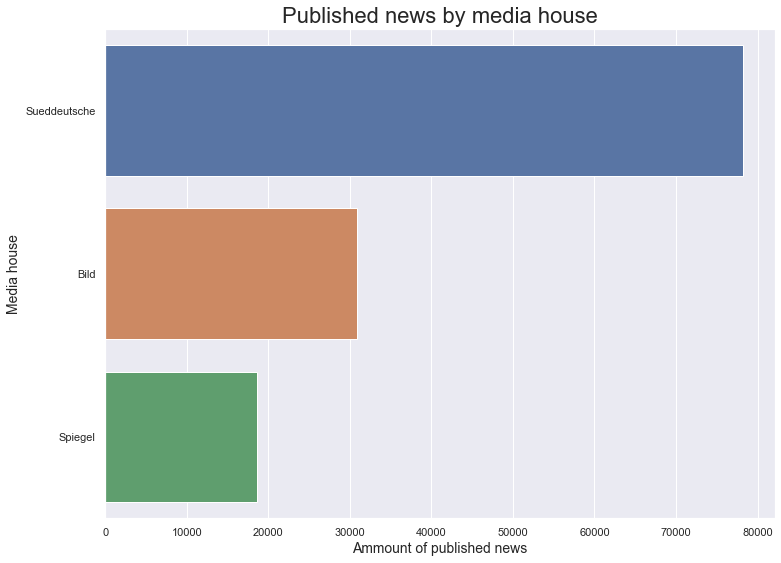

In [106]:
published_news = pd.DataFrame(News_DataFrame.News_page.value_counts())
ax = sns.barplot(x = "News_page", y=published_news.index,data=published_news,orient="h")
plt.title("Published news by media house",fontsize=22)
plt.xlabel('Ammount of published news', fontsize=14);
plt.ylabel('Media house', fontsize=14);
save_fig(ax, "Publishing Analysis/Ammount of published news by media house")

## Ammount of published news from DPA and sueddeutsche authors

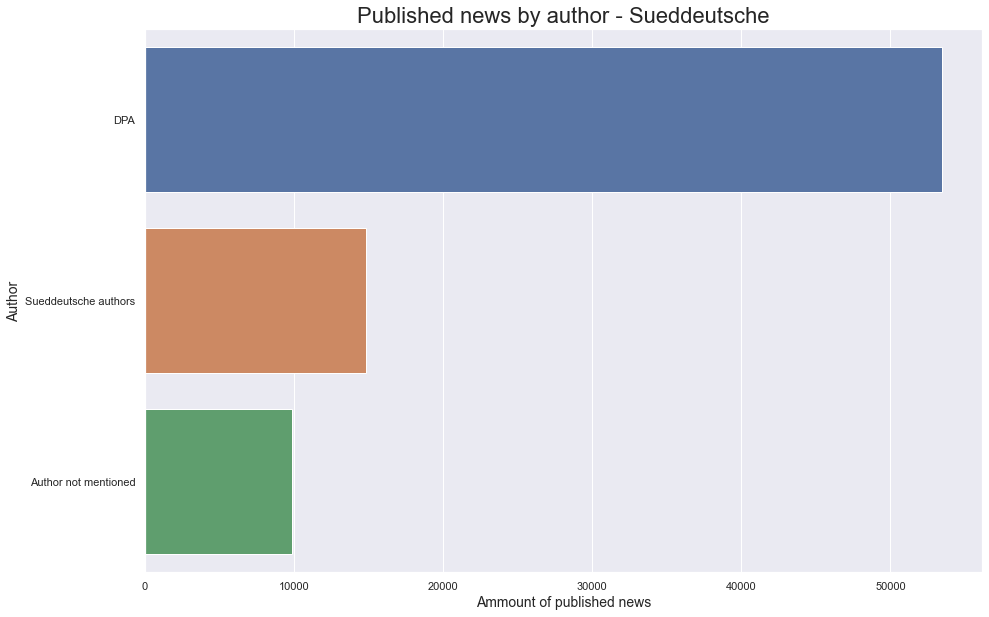

In [107]:
ammount_DPA_article = len(Sueddeutsche_DataFrame[Sueddeutsche_DataFrame["Breadcrumb"] == "dpa"])
ammount_Sueddeutsche_author_article = len(Sueddeutsche_DataFrame[~Sueddeutsche_DataFrame["author"].isnull()])
ammount_unmentioned_authors = len(Sueddeutsche_DataFrame) - ammount_DPA_article - ammount_Sueddeutsche_author_article
df = pd.DataFrame([["DPA", ammount_DPA_article],["Sueddeutsche authors",ammount_Sueddeutsche_author_article],["Author not mentioned",ammount_unmentioned_authors]],columns=["Author","Ammount_of_published_articles"])

ax = sns.barplot(x = df.Ammount_of_published_articles, y="Author", data=df,orient="h")
plt.title("Published news by author - Sueddeutsche",fontsize=22)
plt.xlabel('Ammount of published news', fontsize=14);
plt.ylabel('Author', fontsize=14);
save_fig(ax, "Publishing Analysis/Ammount of published news author sueddeutsche")

## Published articles by weekday

In [108]:
day_size_order = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", "Sunday"],
    ordered=True
)

## Published articles by weekday - Spiegel

C:\Users\Jan\AppData\Local\Temp\ipykernel_17480\1968348298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spiegel_DataFrame["weekday_name"] = Spiegel_DataFrame['Date_Info'].dt.day_name()
C:\Users\Jan\AppData\Local\Temp\ipykernel_17480\1968348298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spiegel_DataFrame['weekday_name'] = Spiegel_DataFrame['weekday_name'].astype(day_size_order)


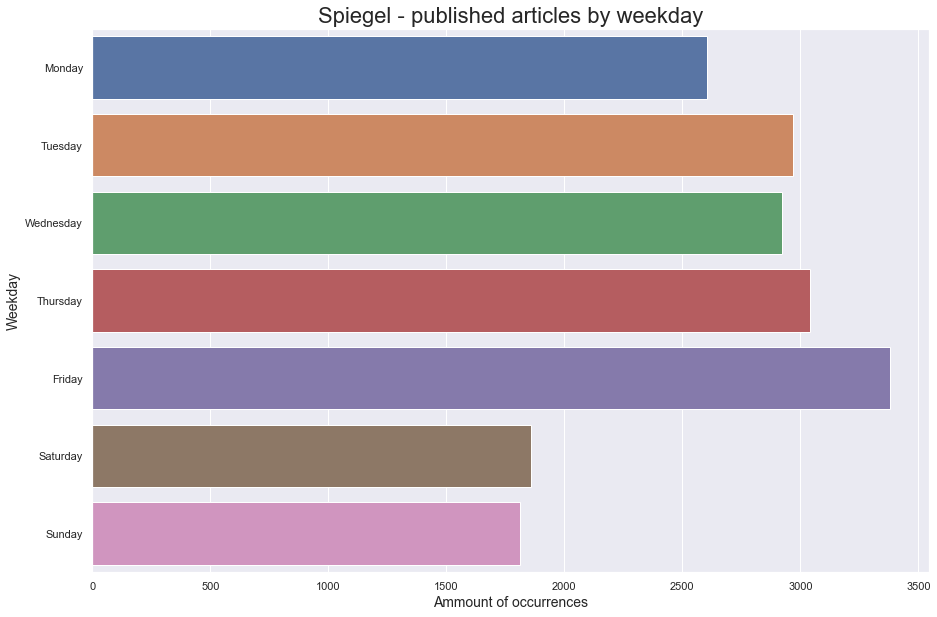

In [109]:
Spiegel_DataFrame["weekday_name"] = Spiegel_DataFrame['Date_Info'].dt.day_name()

Spiegel_DataFrame['weekday_name'] = Spiegel_DataFrame['weekday_name'].astype(day_size_order)

weekday_count = Spiegel_DataFrame["weekday_name"].value_counts().sort_values()
values = weekday_count.values
keys = weekday_count.keys()


ax = sns.barplot(x = values, y=keys,orient="h")

plt.title("Spiegel - published articles by weekday",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('Weekday', fontsize=14);

save_fig(ax, "Publishing Analysis/Published articles by weekday Spiegel")

## Published articles by weekday - Sueddeutsche

C:\Users\Jan\AppData\Local\Temp\ipykernel_17480\732675299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sueddeutsche_DataFrame["weekday_name"] = Sueddeutsche_DataFrame['Date_Info'].dt.day_name()
C:\Users\Jan\AppData\Local\Temp\ipykernel_17480\732675299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sueddeutsche_DataFrame['weekday_name'] = Sueddeutsche_DataFrame['weekday_name'].astype(day_size_order)


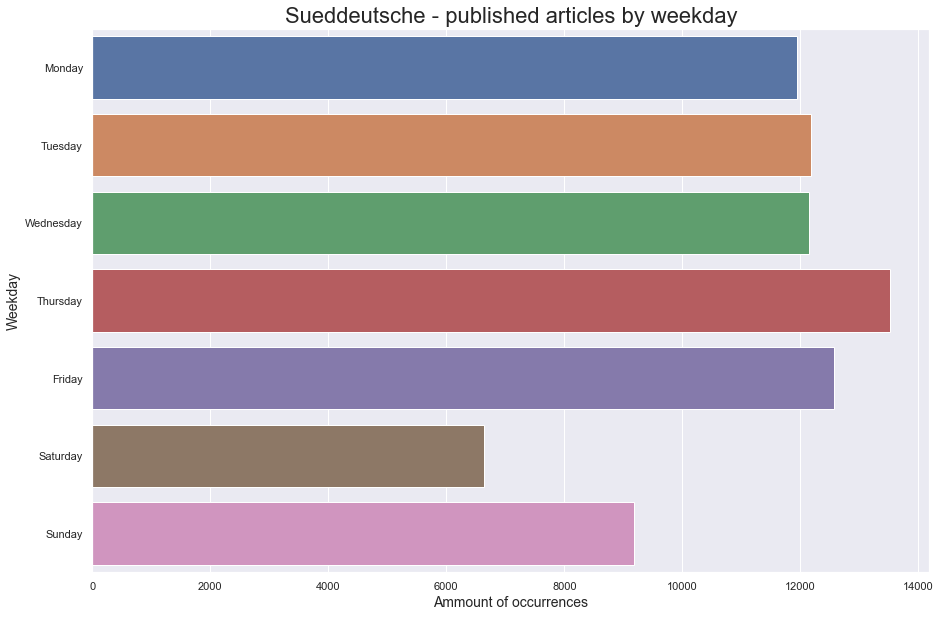

In [110]:
Sueddeutsche_DataFrame["weekday_name"] = Sueddeutsche_DataFrame['Date_Info'].dt.day_name()

Sueddeutsche_DataFrame['weekday_name'] = Sueddeutsche_DataFrame['weekday_name'].astype(day_size_order)

weekday_count = Sueddeutsche_DataFrame["weekday_name"].value_counts().sort_values()
values = weekday_count.values
keys = weekday_count.keys()

ax = sns.barplot(x = values, y=keys,orient="h")

plt.title("Sueddeutsche - published articles by weekday",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('Weekday', fontsize=14);

save_fig(ax, "Publishing Analysis/Published articles by weekday Sueddeutsche")

## Published articles by weekday - Bild

C:\Users\Jan\AppData\Local\Temp\ipykernel_17480\986670120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bild_DataFrame["weekday_name"] = Bild_DataFrame['Date_Info'].dt.day_name()
C:\Users\Jan\AppData\Local\Temp\ipykernel_17480\986670120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bild_DataFrame['weekday_name'] = Bild_DataFrame['weekday_name'].astype(day_size_order)


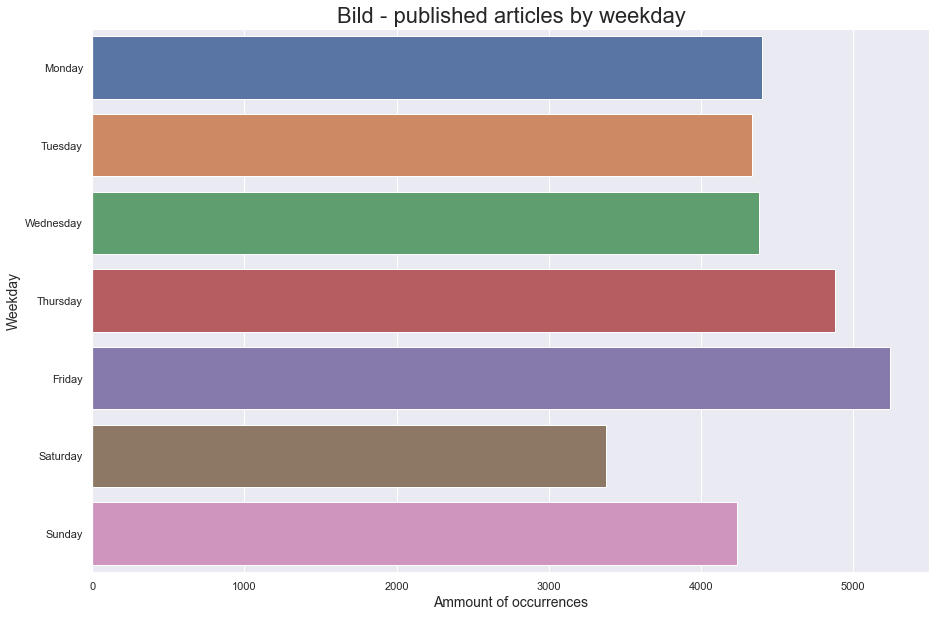

In [111]:
Bild_DataFrame["weekday_name"] = Bild_DataFrame['Date_Info'].dt.day_name()

Bild_DataFrame['weekday_name'] = Bild_DataFrame['weekday_name'].astype(day_size_order)

weekday_count = Bild_DataFrame["weekday_name"].value_counts().sort_values()
values = weekday_count.values
keys = weekday_count.keys()

ax = sns.barplot(x = values, y=keys,orient="h")

plt.title("Bild - published articles by weekday",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('Weekday', fontsize=14);

save_fig(ax, "Publishing Analysis/Published articles by weekday Bild")

# Category Analysis

## Categories Spiegel

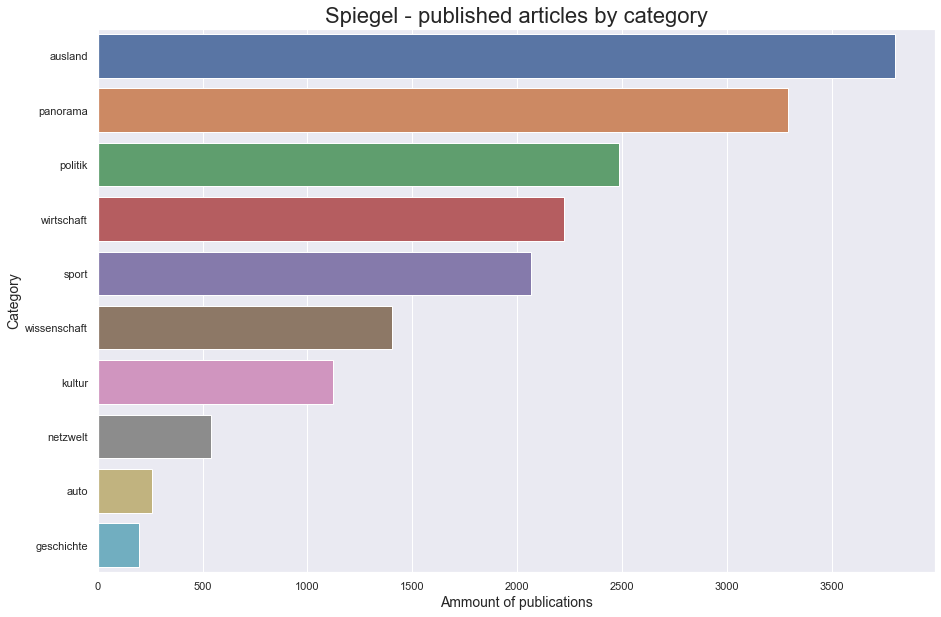

In [112]:
categories_spiegel = pd.DataFrame(Spiegel_DataFrame["Kategorie"].value_counts()[:10])

ax = sns.barplot(x = categories_spiegel.Kategorie, y=categories_spiegel.index,data=categories_spiegel,orient="h")

plt.title("Spiegel - published articles by category",fontsize=22)
plt.xlabel('Ammount of publications', fontsize=14);
plt.ylabel('Category', fontsize=14);

save_fig(ax, "Category Analysis/Published articles by category Spiegel")

## Categories Sueddeutsche

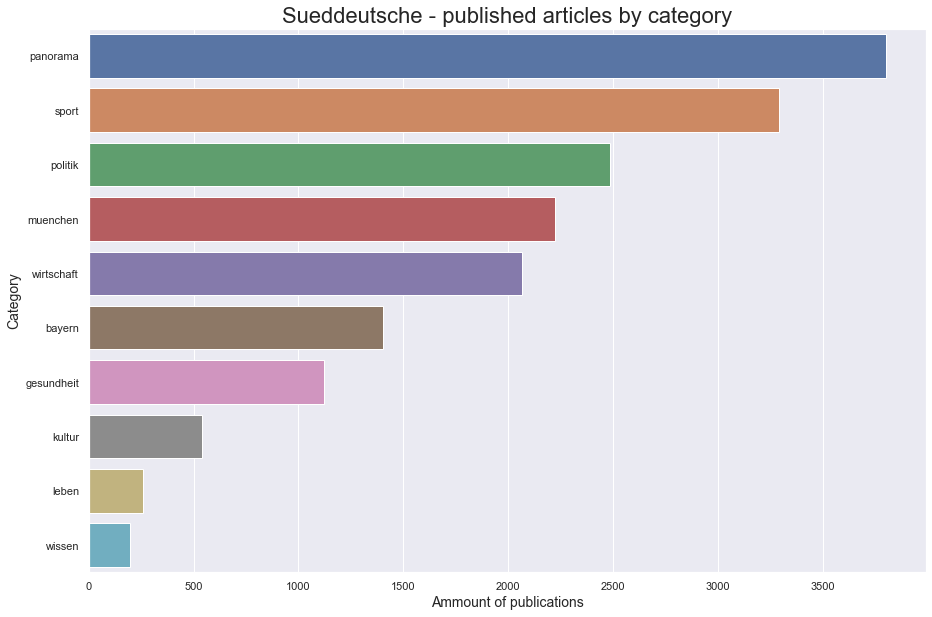

In [113]:
categories_sueddeutsche = pd.DataFrame(Sueddeutsche_DataFrame["Kategorie"].value_counts()[:10])

ax = sns.barplot(x = categories_spiegel.Kategorie, y=categories_sueddeutsche.index,data=categories_sueddeutsche,orient="h")

plt.title("Sueddeutsche - published articles by category",fontsize=22)
plt.xlabel('Ammount of publications', fontsize=14);
plt.ylabel('Category', fontsize=14);

save_fig(ax, "Category Analysis/Published articles by category Sueddeutsche")


## Categories Bild

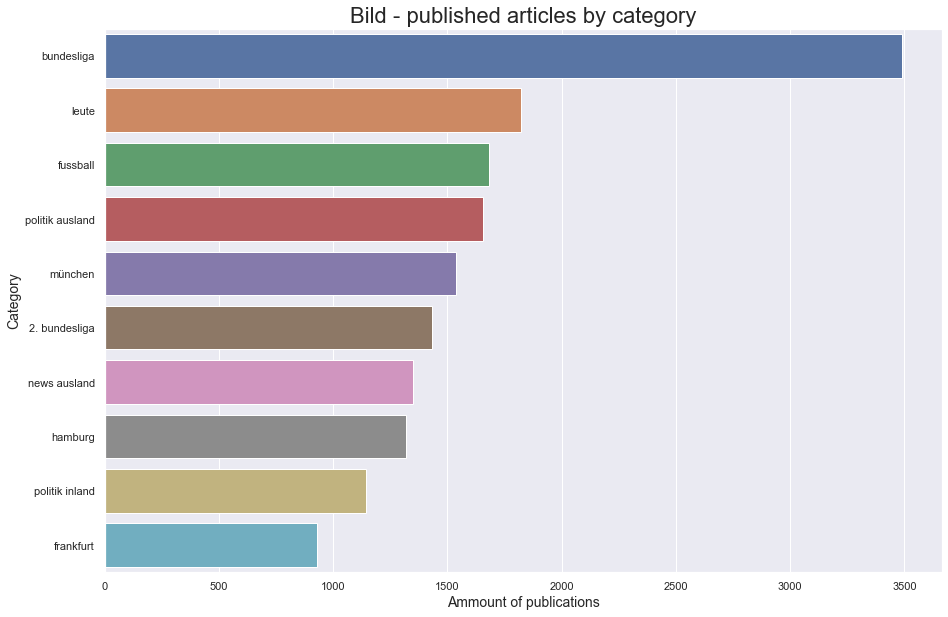

In [114]:
categories_bild = pd.DataFrame(Bild_DataFrame["Kategorie"].value_counts()[:10])
ax = sns.barplot(x = categories_bild.Kategorie, y=categories_bild.index,data=categories_bild,orient="h")

plt.title("Bild - published articles by category",fontsize=22)
plt.xlabel('Ammount of publications', fontsize=14);
plt.ylabel('Category', fontsize=14);

save_fig(ax, "Category Analysis/Published articles by category Bild")

# KeyWords Analysis

## Highest occurring keyWords in news

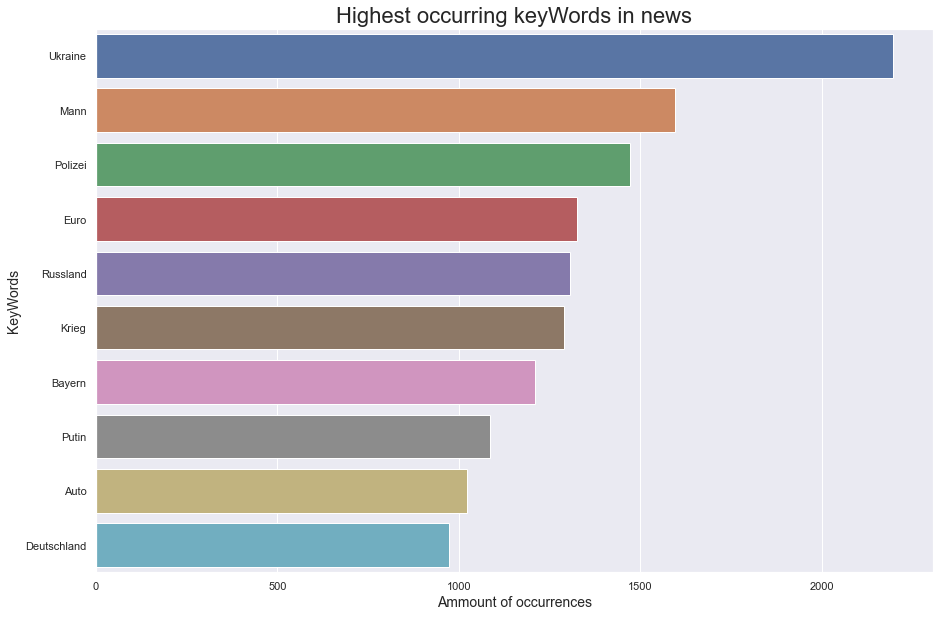

In [115]:
all_keyWords_occurence = pd.DataFrame(News_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=all_keyWords_occurence.index,data=all_keyWords_occurence,orient="h")

plt.title("Highest occurring keyWords in news",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('KeyWords', fontsize=14);

save_fig(ax, "KeyWord Analysis/Highest occurring keywords in news")

## Highest occurring keyWord by news media

### Highest occurring keyWord in Spiegel

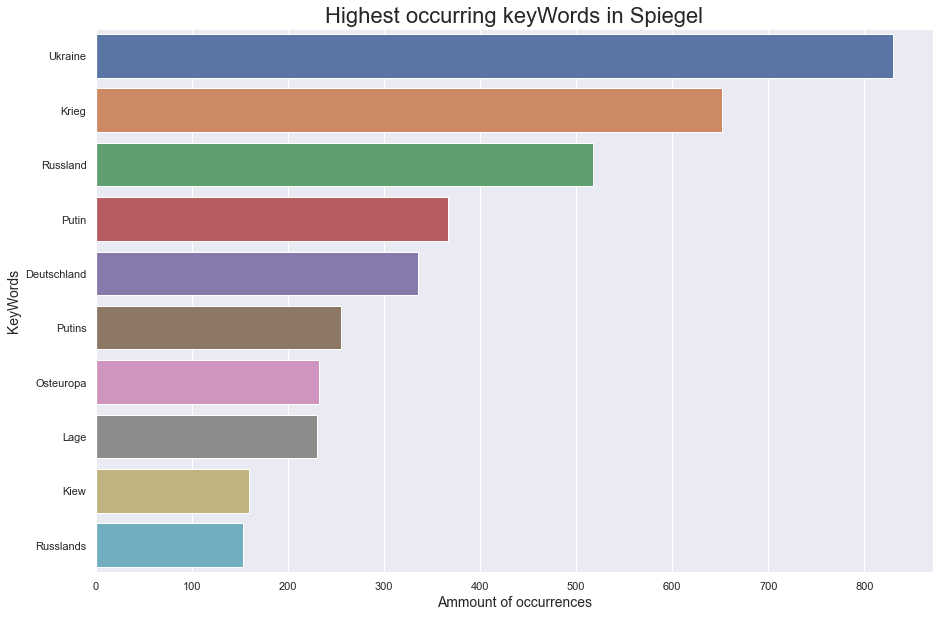

In [116]:
spiegel_keyWords_occurence = pd.DataFrame(Spiegel_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=spiegel_keyWords_occurence.index,data=spiegel_keyWords_occurence,orient="h")

plt.title("Highest occurring keyWords in Spiegel",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('KeyWords', fontsize=14);

save_fig(ax, "KeyWord Analysis/Highest occurring keywords in Spiegel")

### Highest occurring keyWord in Sueddeutsche

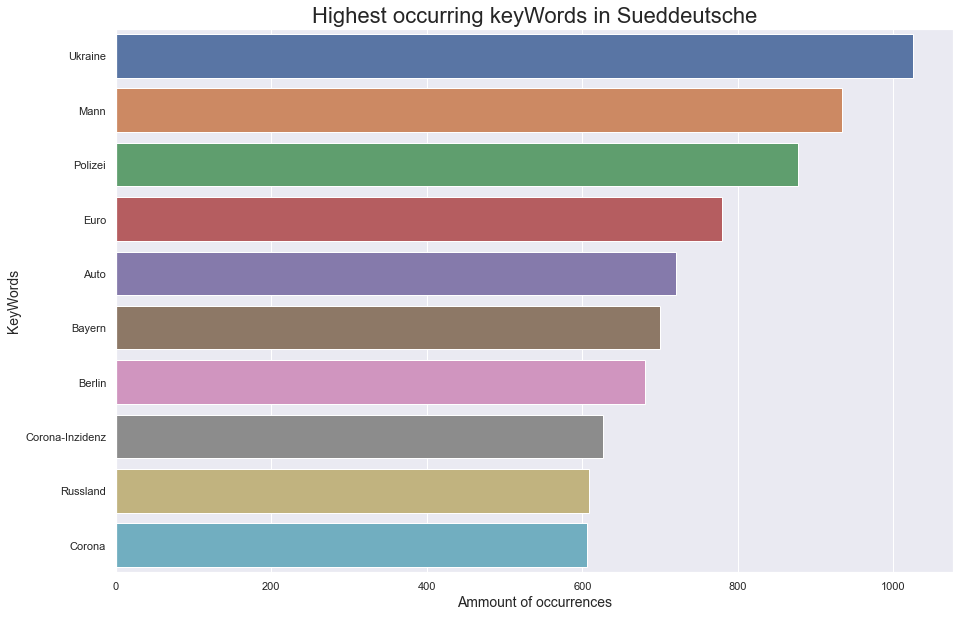

In [117]:
sueddeutsche_keyWords_occurence = pd.DataFrame(Sueddeutsche_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=sueddeutsche_keyWords_occurence.index,data=sueddeutsche_keyWords_occurence,orient="h")

plt.title("Highest occurring keyWords in Sueddeutsche",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('KeyWords', fontsize=14);

save_fig(ax, "KeyWord Analysis/Highest occurring keywords in Sueddeutsche")

### Highest occurring keyWord in Bild

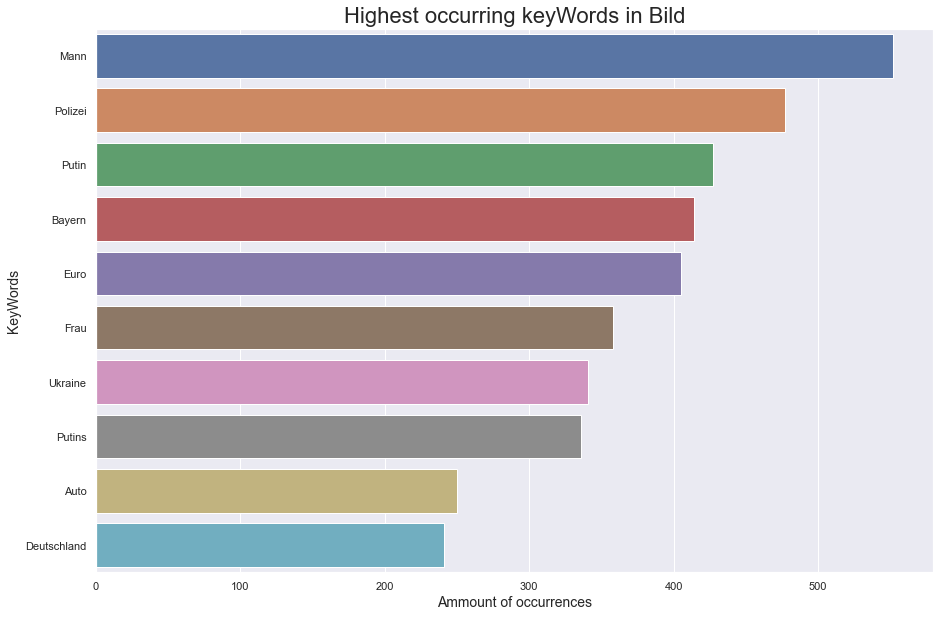

In [118]:
Bild_keyWords_occurence = pd.DataFrame(Bild_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=Bild_keyWords_occurence.index,data=Bild_keyWords_occurence,orient="h")

plt.title("Highest occurring keyWords in Bild",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('KeyWords', fontsize=14);

save_fig(ax, "KeyWord Analysis/Highest occurring keywords in Bild")

## Which keyWords occure most with the top keyWords in title over all media houses

Ukraine
Mann
Polizei
Euro
Russland
Krieg
Bayern
Putin
Auto
Deutschland
Ukraine
Krieg
Russland
Putin
Deutschland
Putins
Osteuropa
Lage
Kiew
Russlands
Ukraine


C:\Users\Jan\AppData\Local\Temp\ipykernel_17480\1500291570.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Mann
Polizei
Euro
Auto
Bayern
Berlin
Corona-Inzidenz
Russland
Corona
Mann
Polizei
Putin
Bayern
Euro
Frau
Ukraine
Putins
Auto
Deutschland


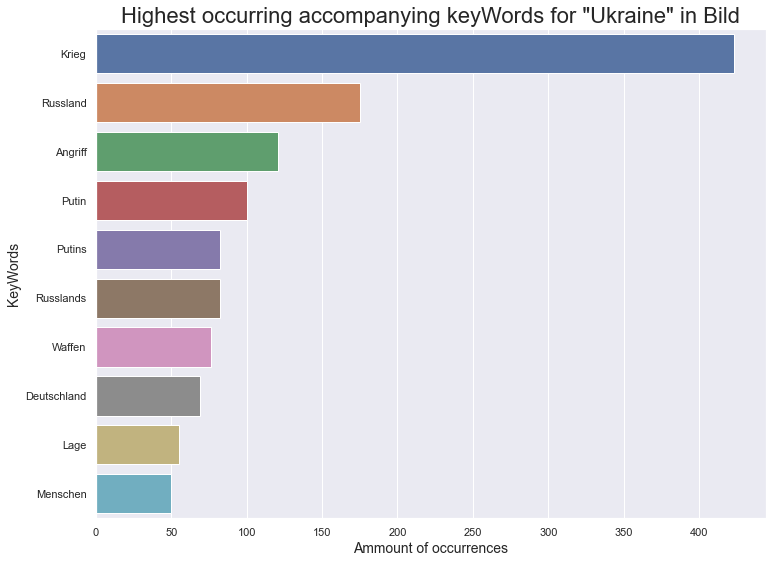

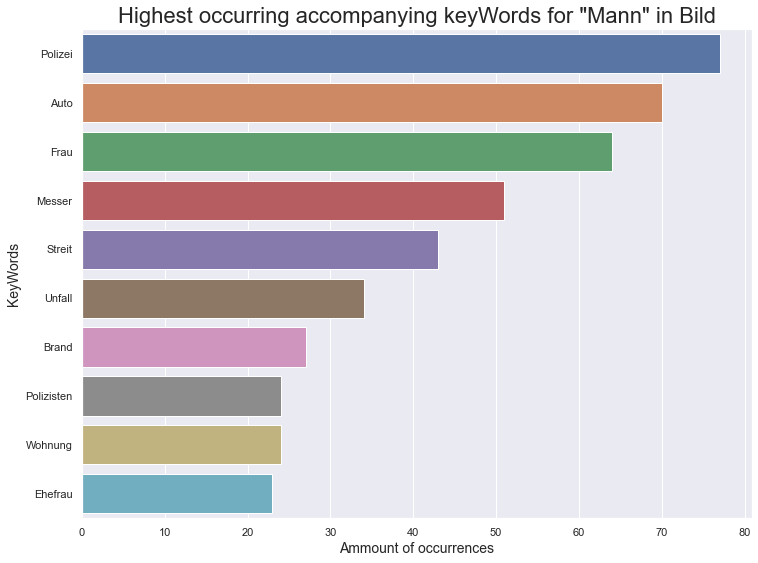

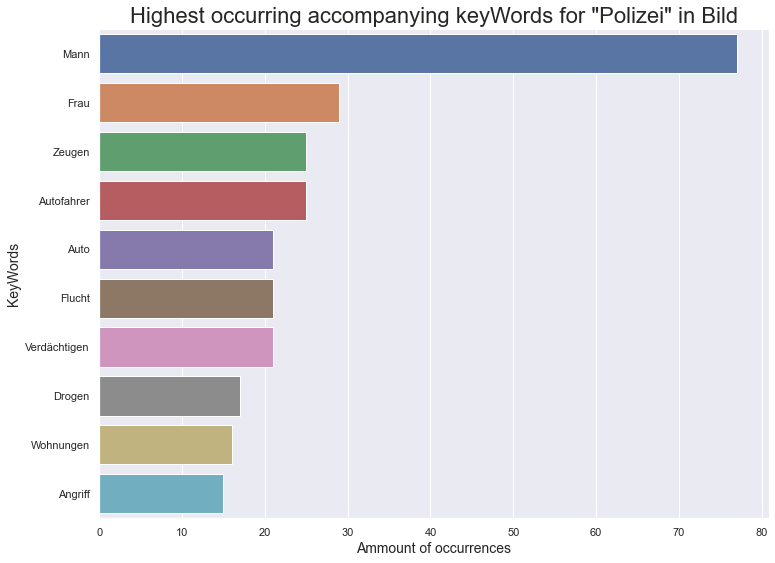

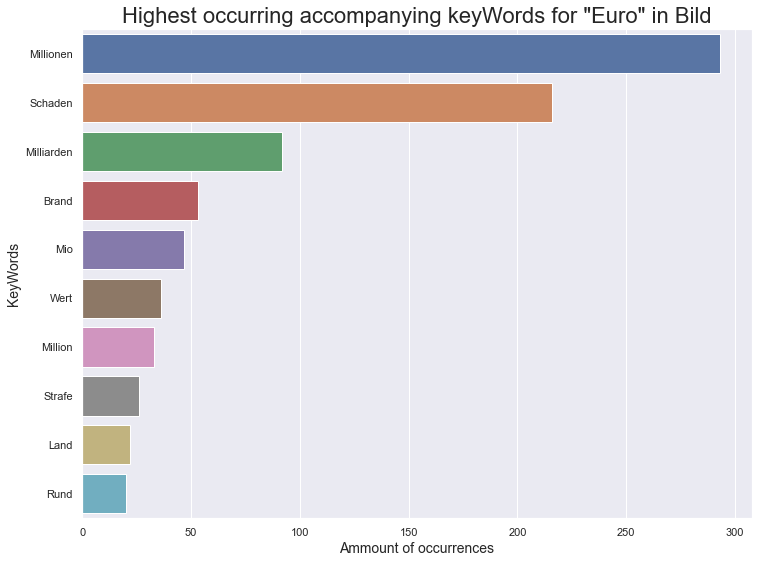

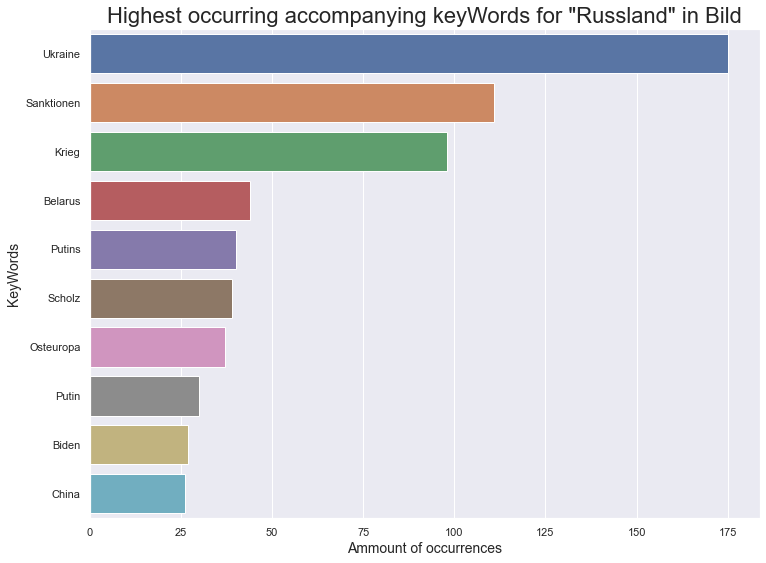

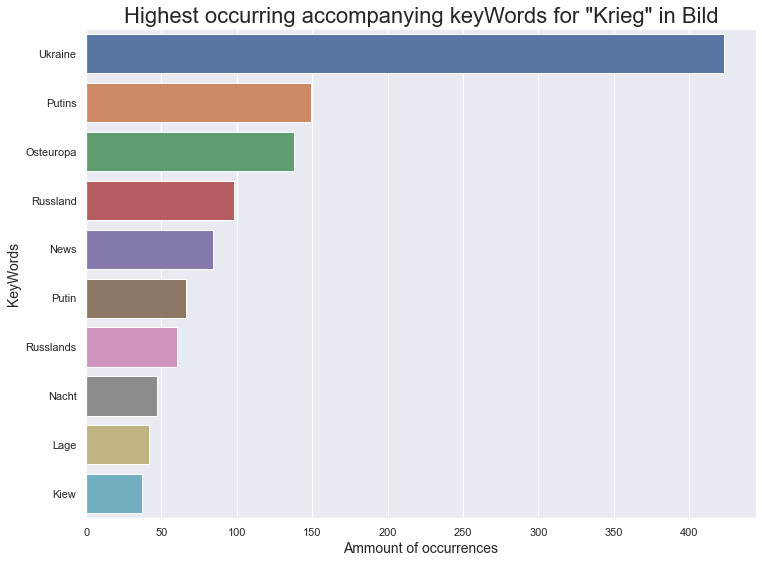

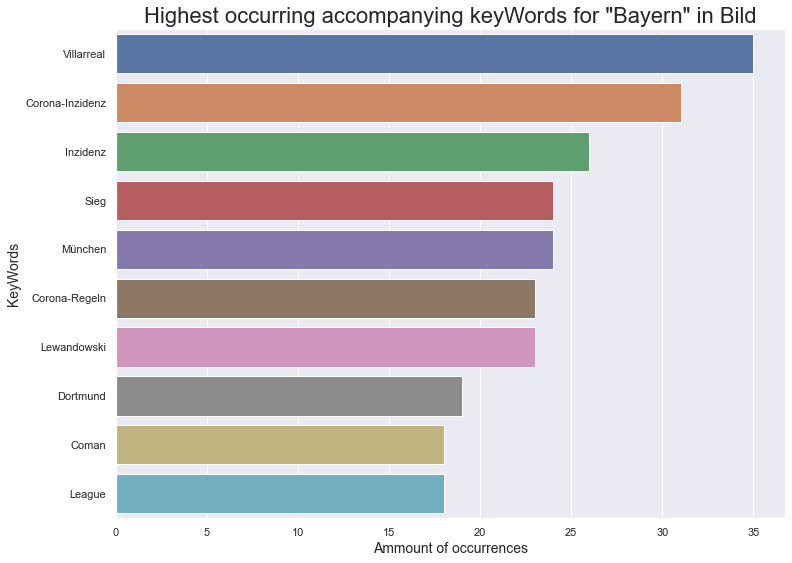

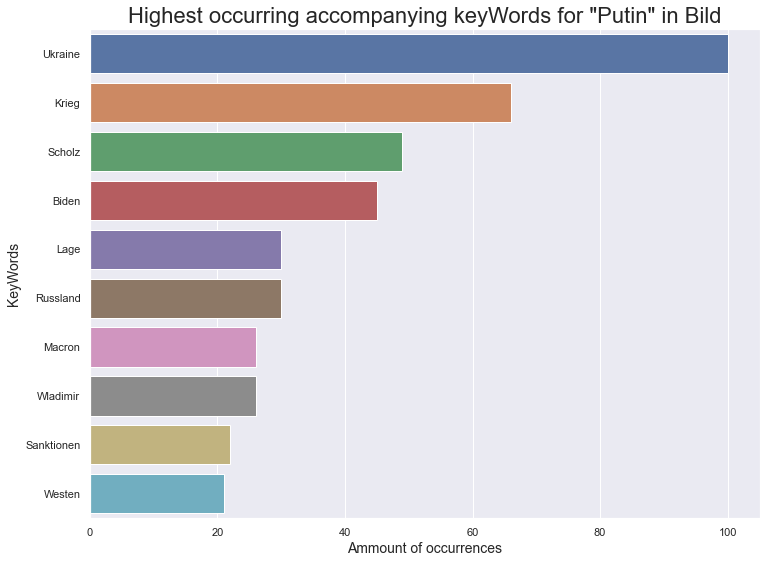

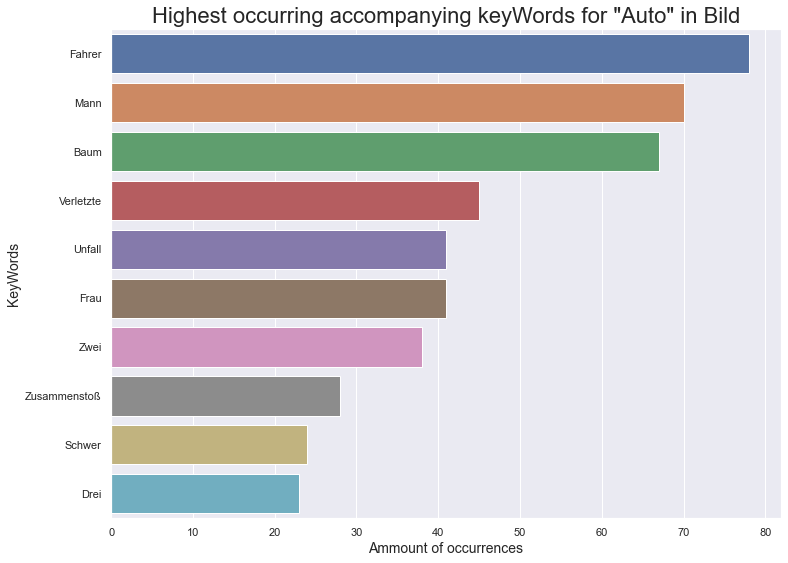

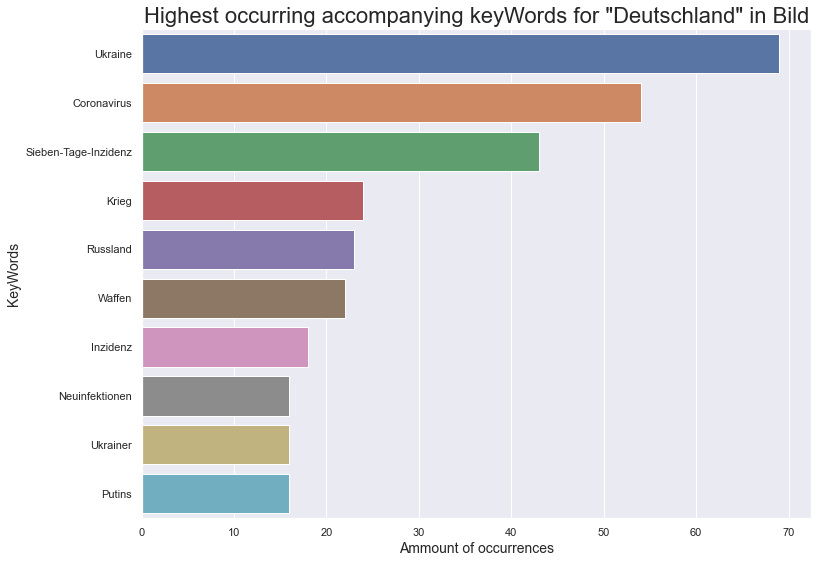

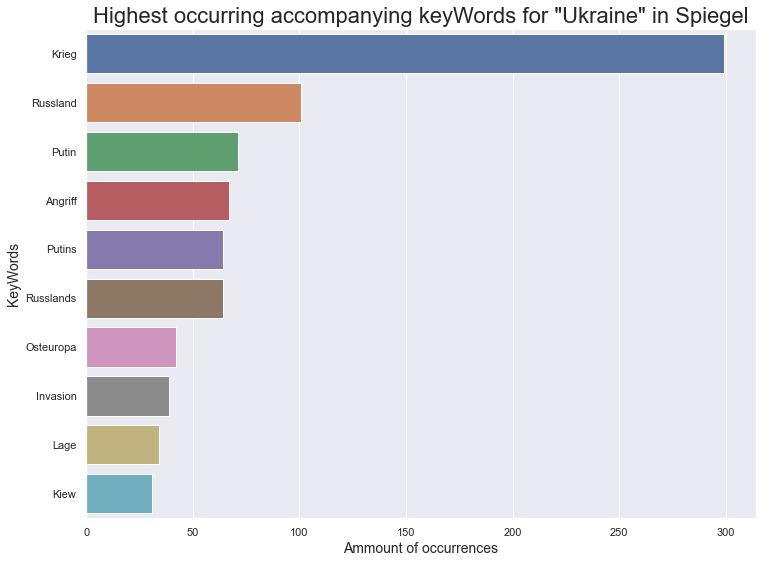

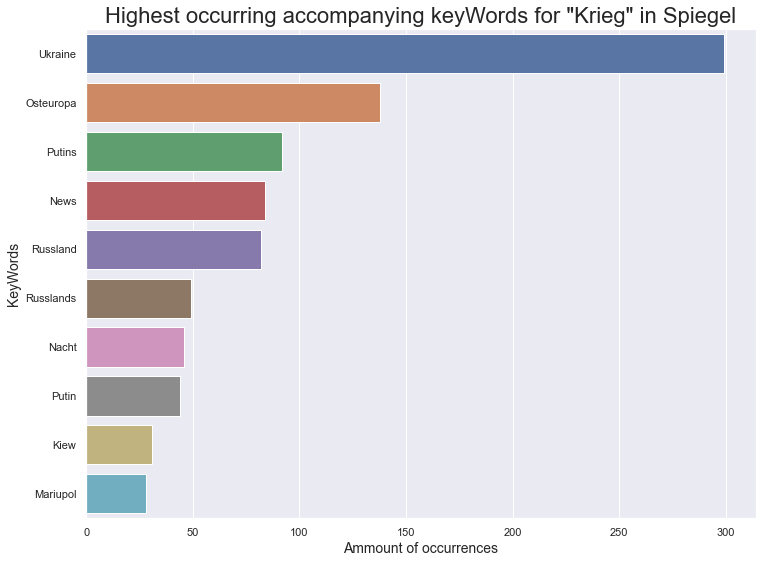

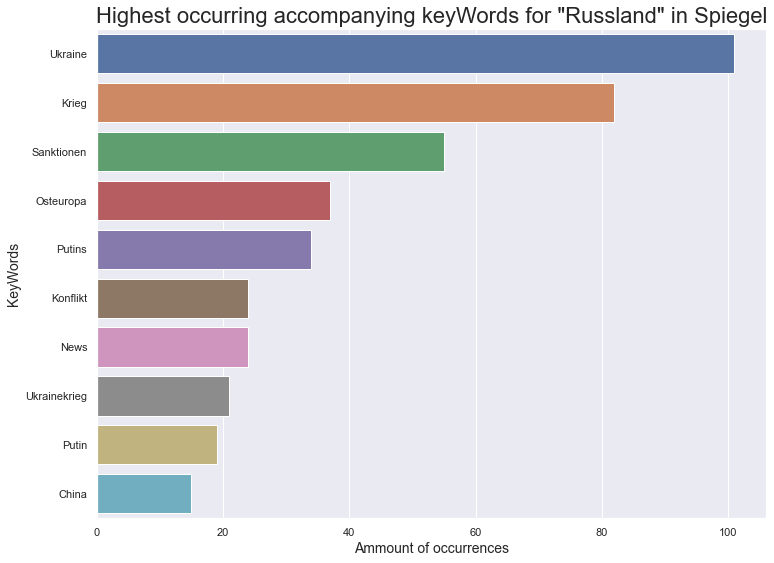

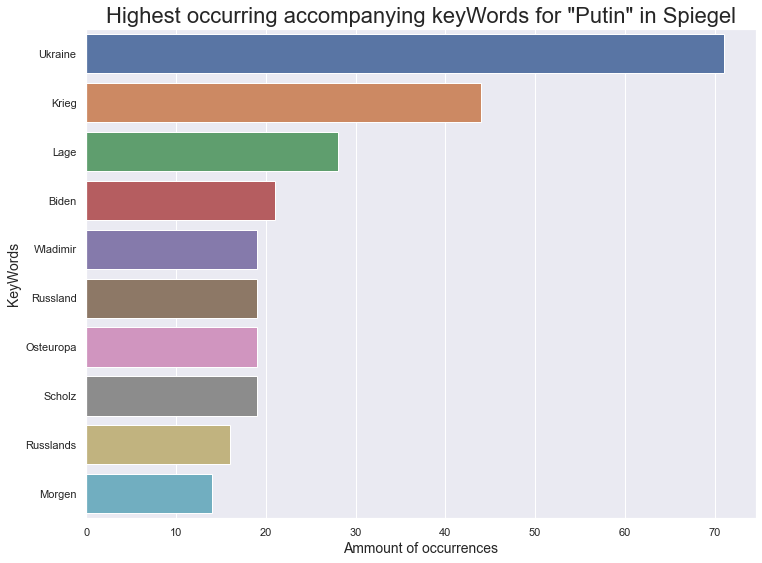

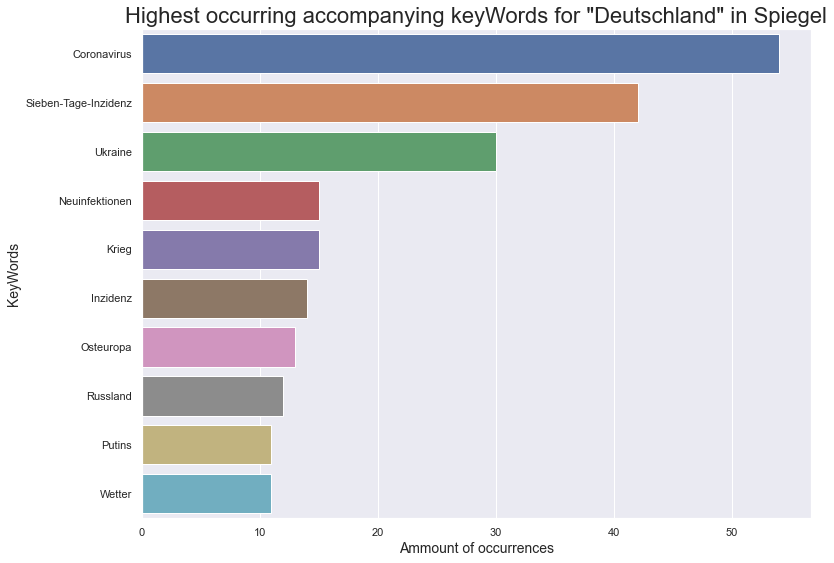

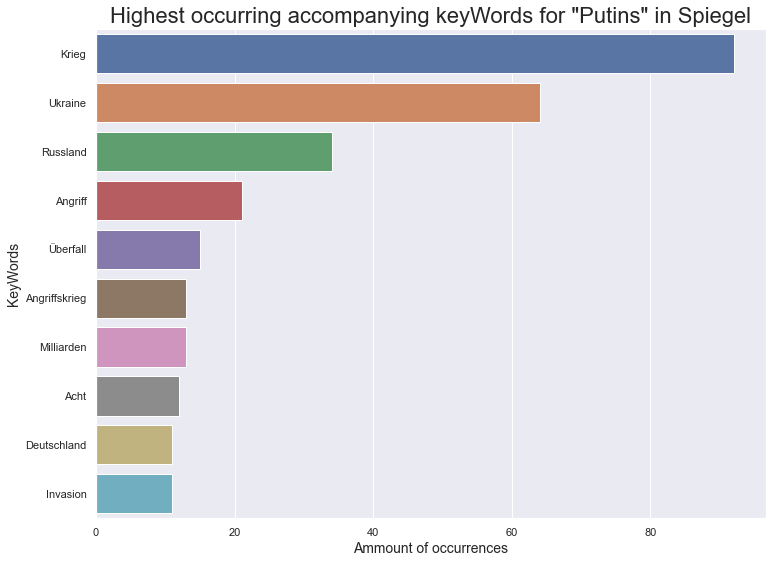

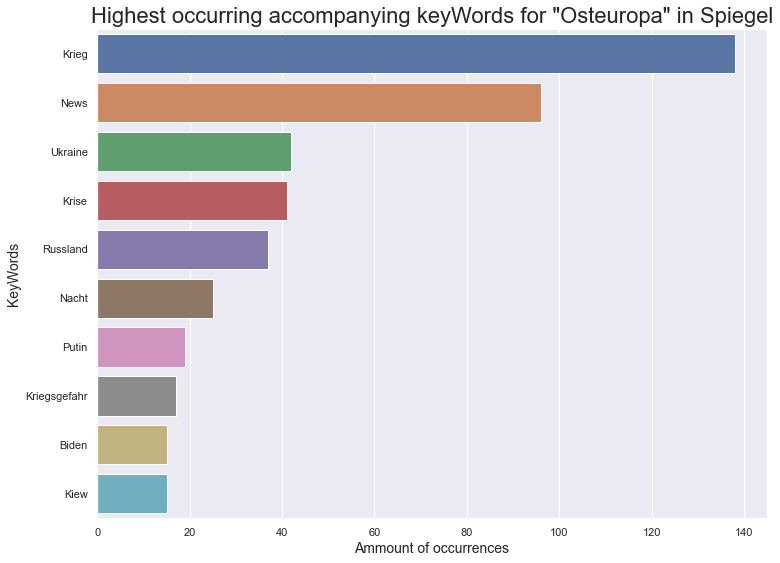

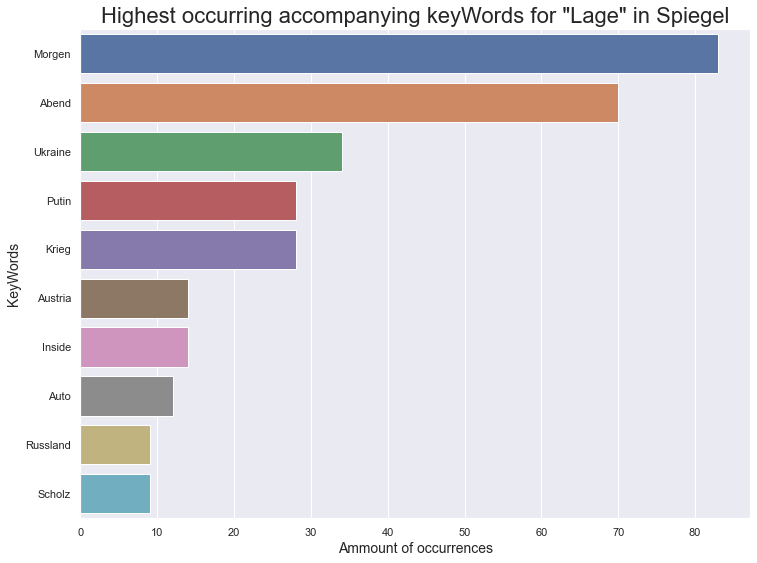

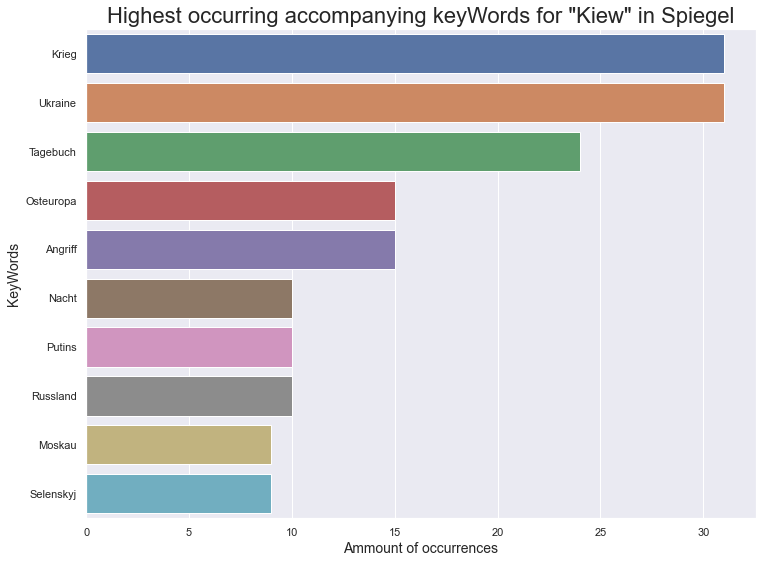

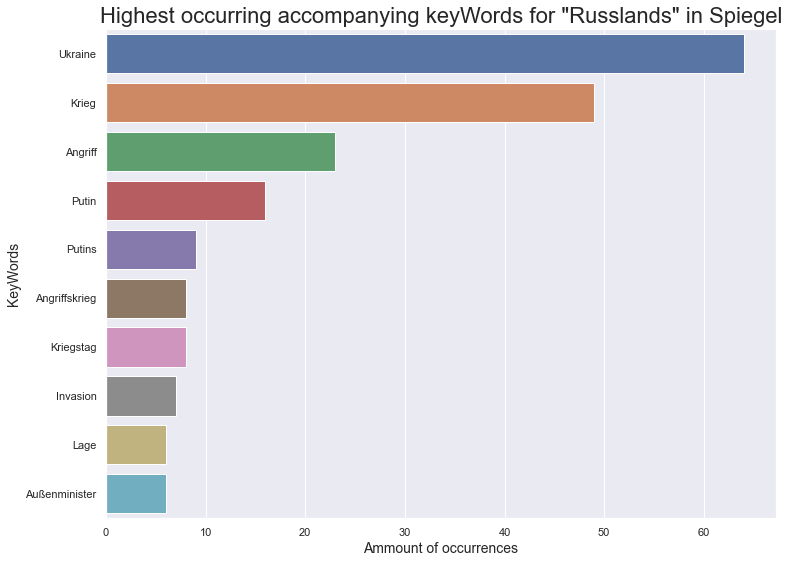

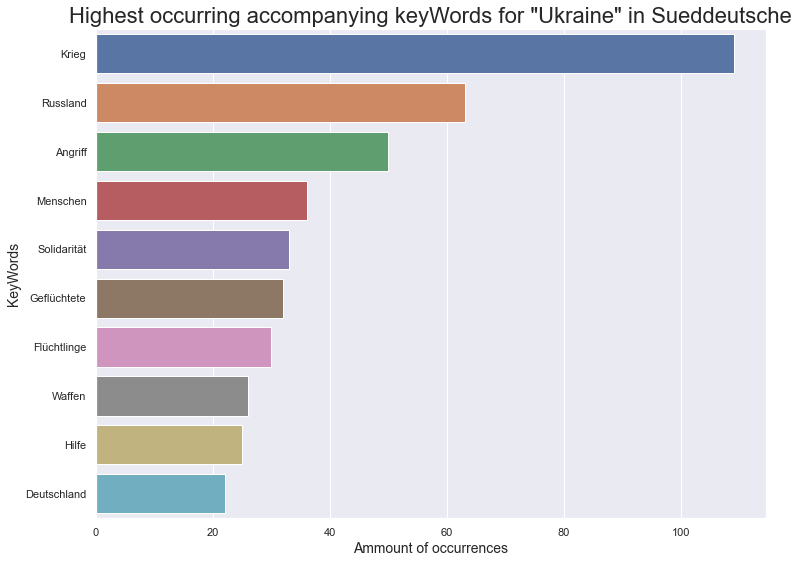

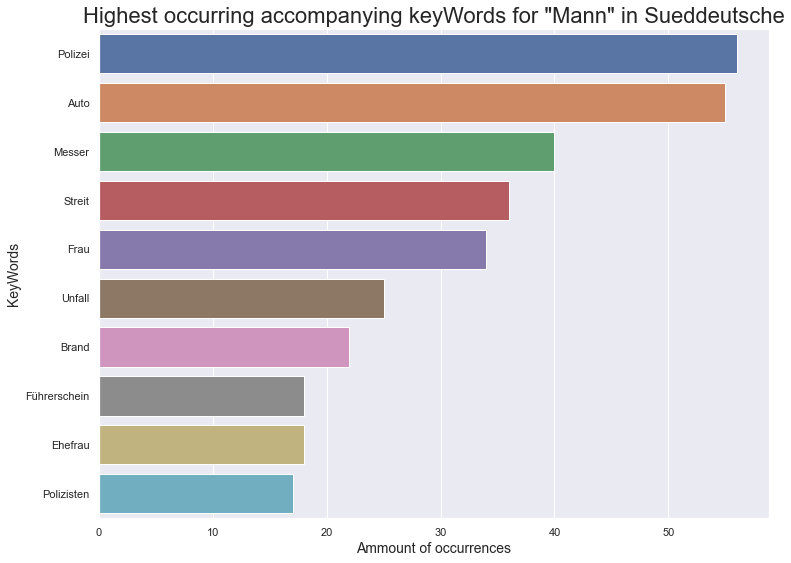

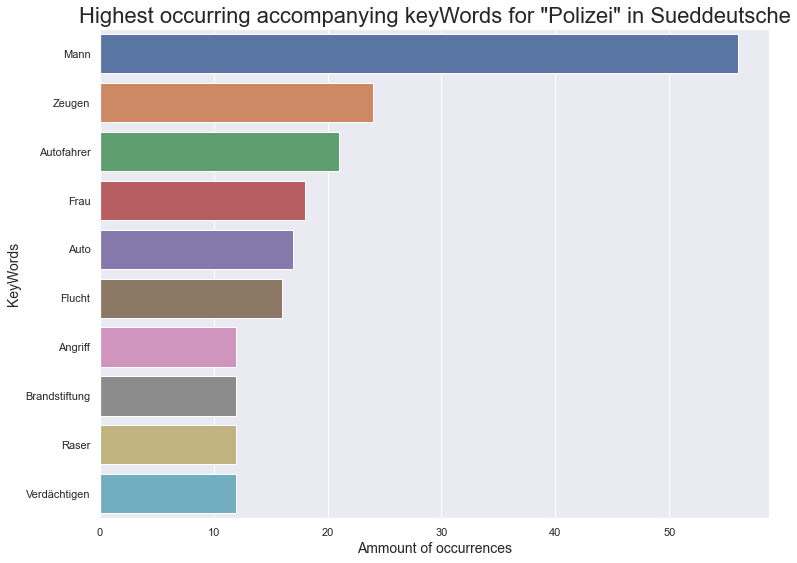

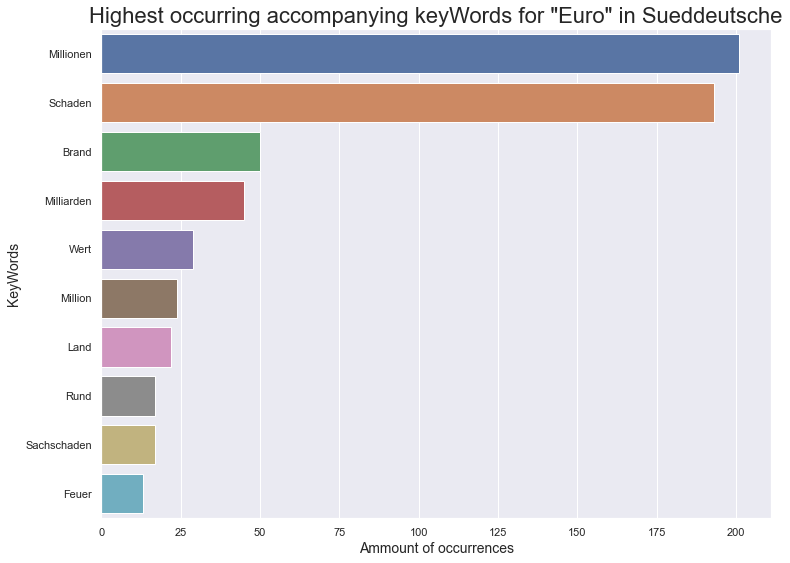

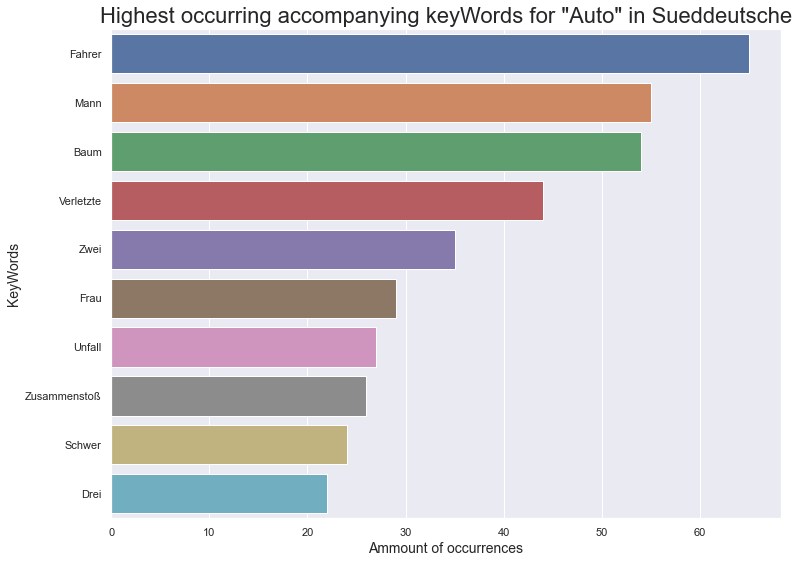

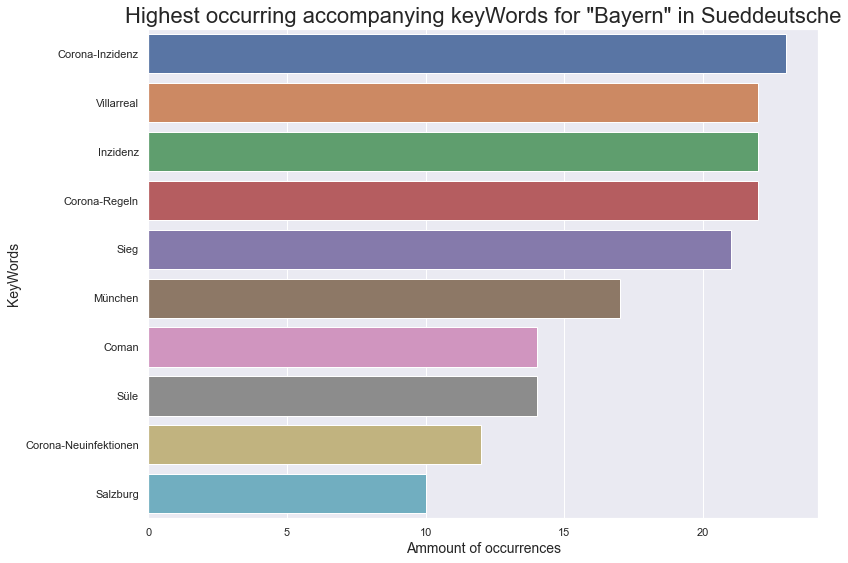

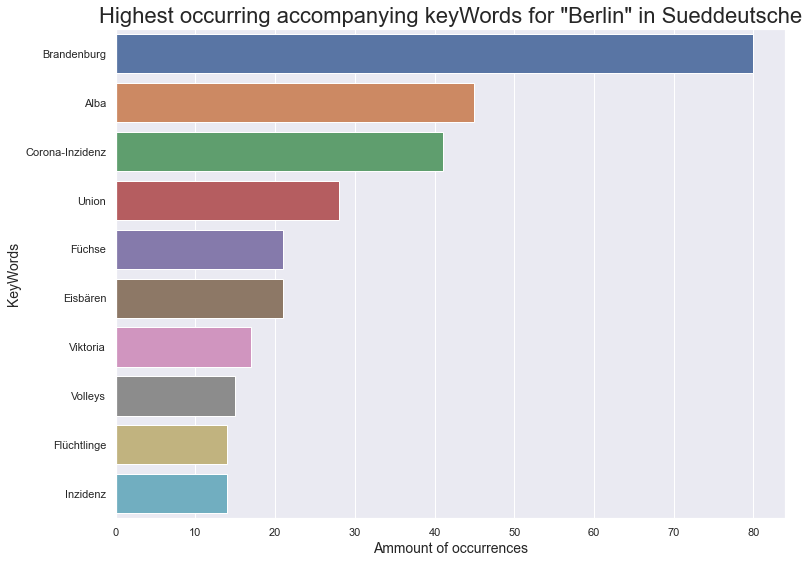

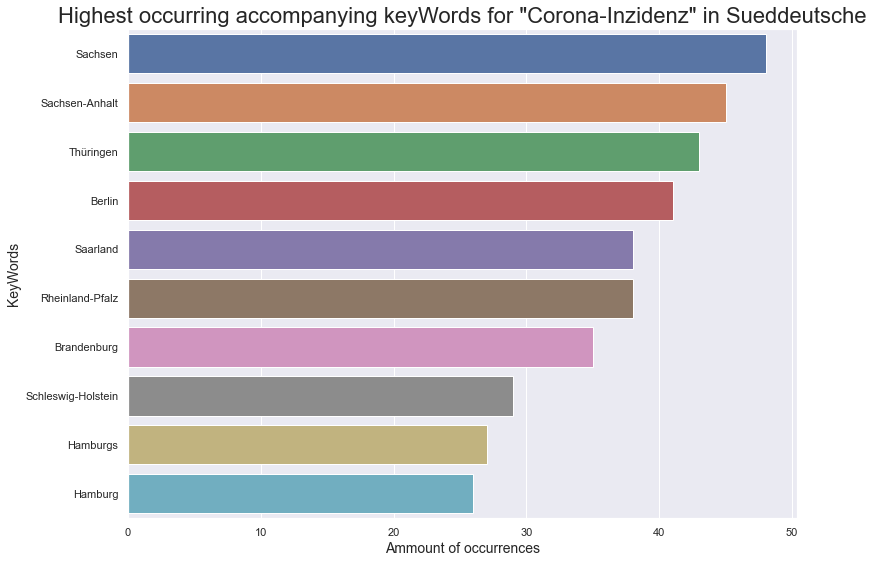

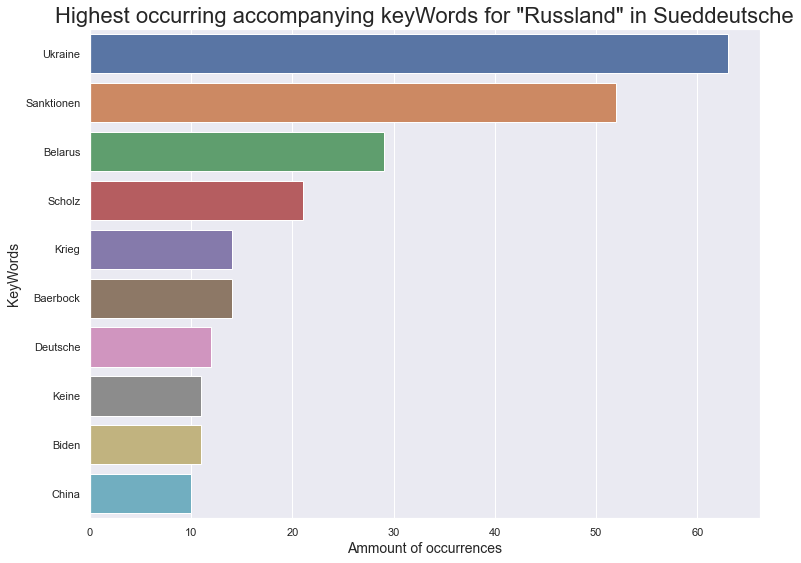

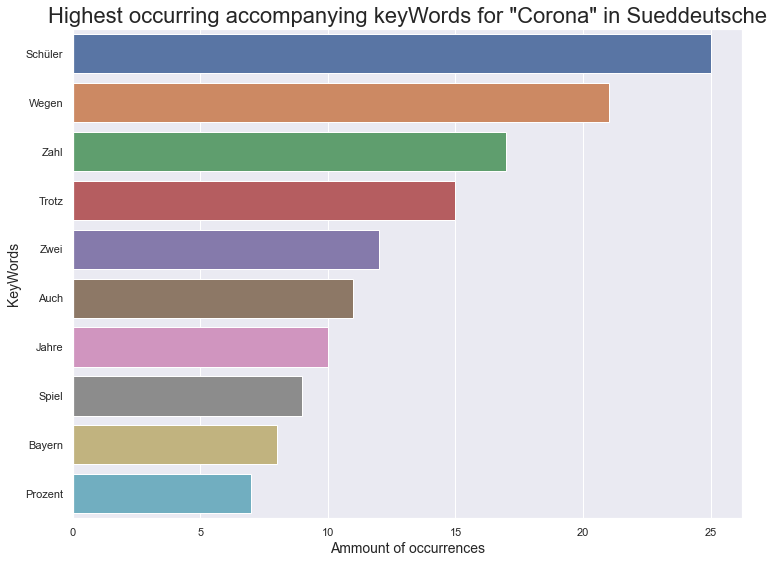

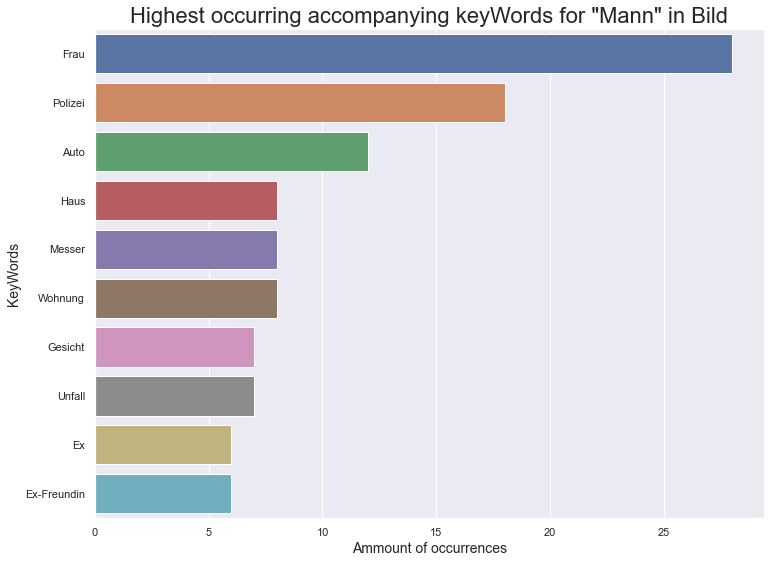

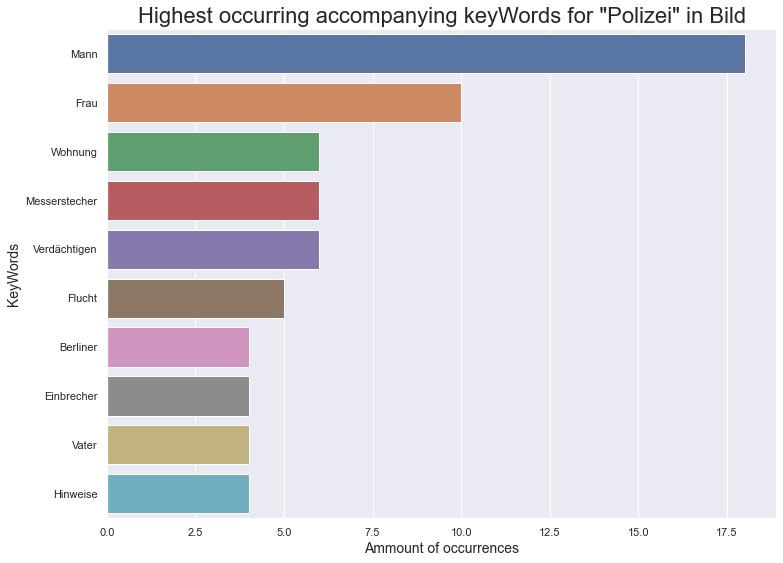

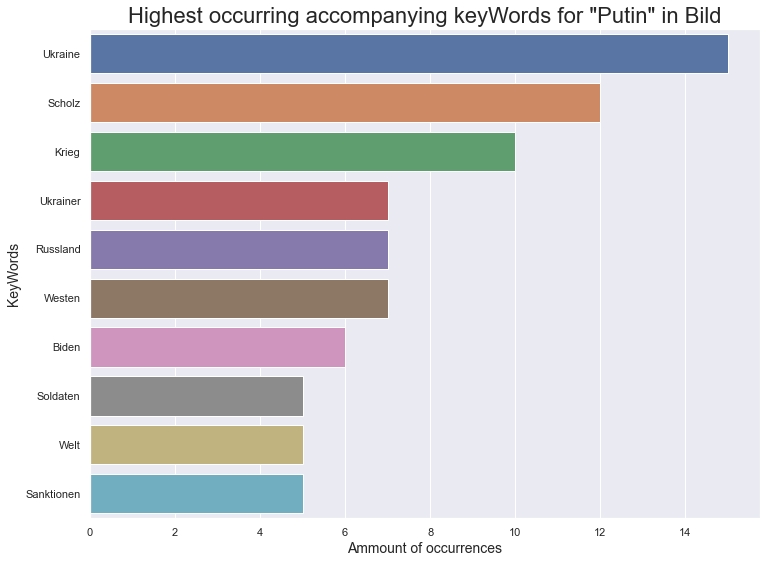

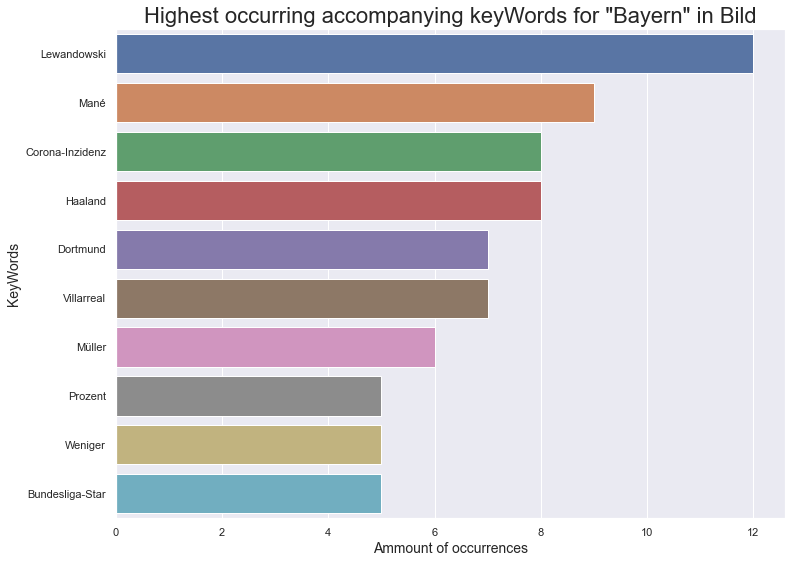

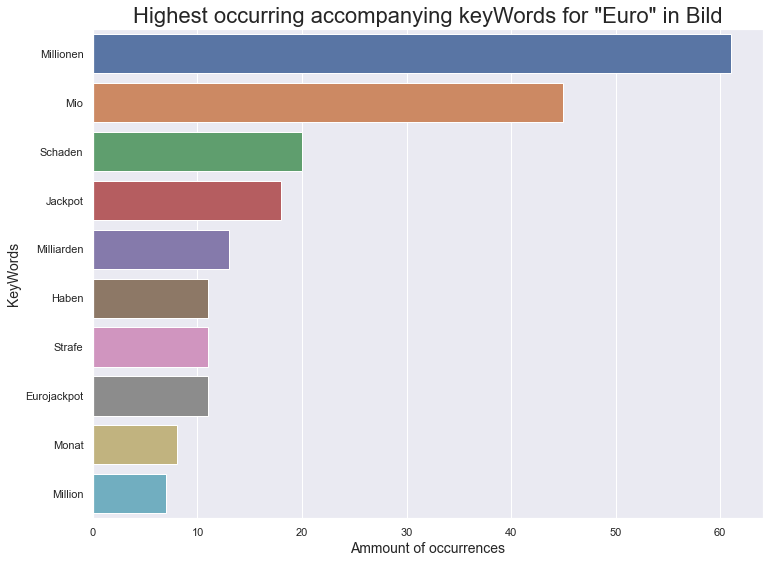

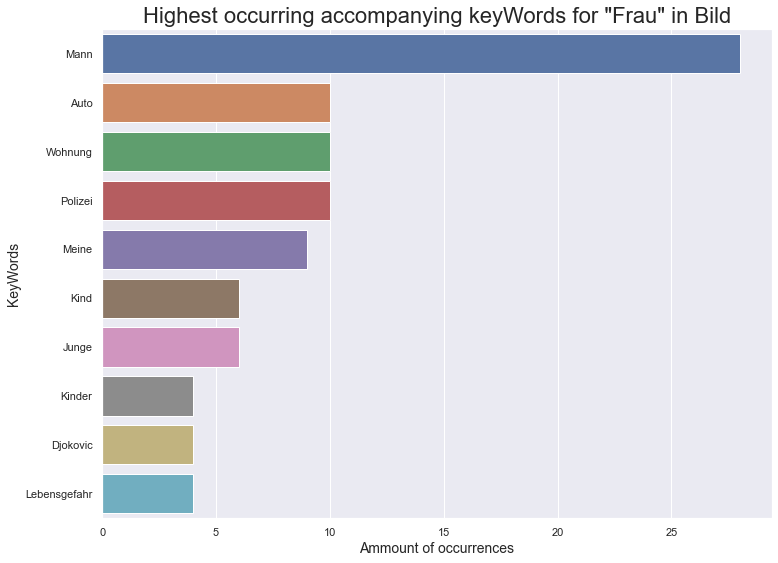

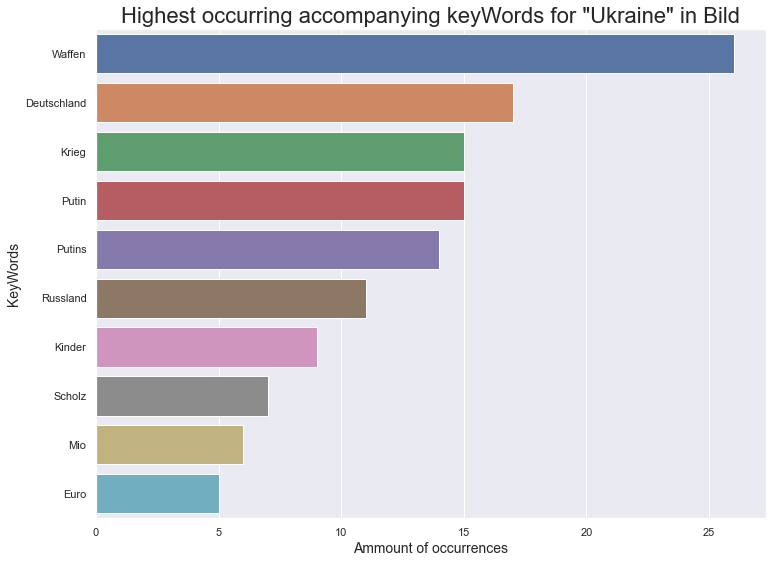

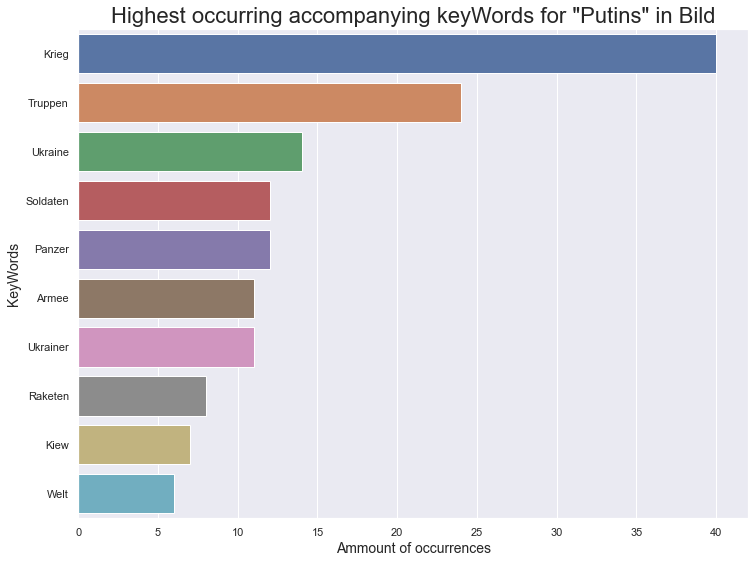

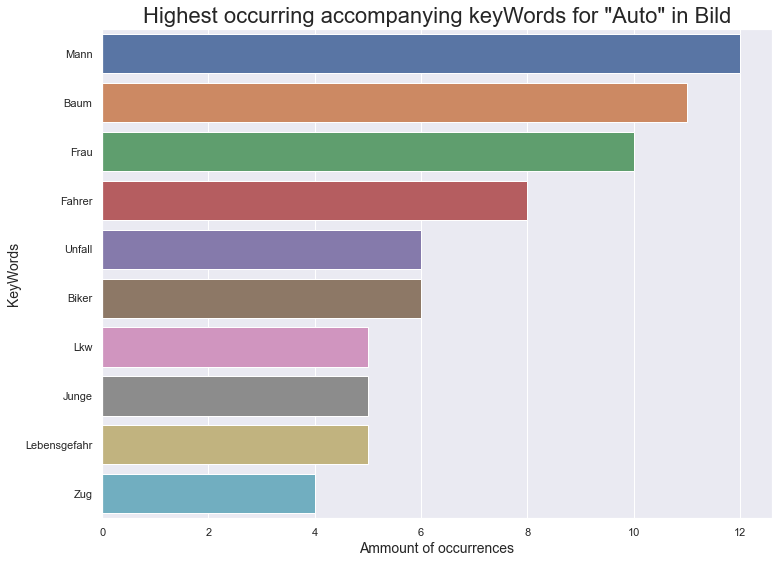

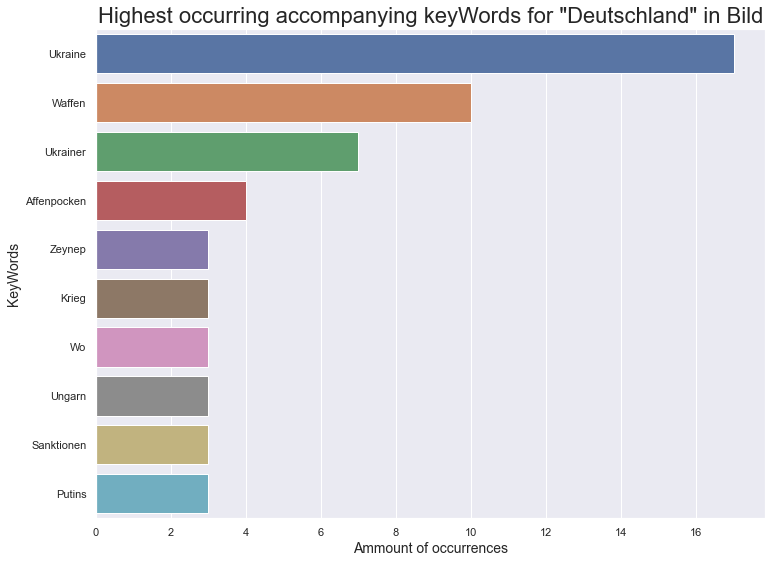

In [119]:
def get_accompanying_keyWords(keyWords, dataFrame):
    media_house = pd.DataFrame(dataFrame.News_page).reset_index().loc[0]["News_page"]
    sns.set(rc={'figure.figsize':(12,9)})
    for keyWord in keyWords:
        print(keyWord)
        # get all articles of interest
        Titel_interesting = pd.DataFrame(dataFrame.loc[dataFrame["Tokens"] == keyWord].Titel)

        # tokenize
        Titel_interesting["Tokens"] = Titel_interesting.apply(lambda row: nltk.word_tokenize(row['Titel']), axis=1)

        # explode
        Titel_interesting = Titel_interesting.explode("Tokens")

        # remove stopwords #1
        Titel_interesting = Titel_interesting[~Titel_interesting['Tokens'].isin(stopwords.words("german"))]
        # more stopwords
        # continues extension
        uninteresting_titles= ["Der", "Die", "Das","Was","Warum","Er","Sie", "Es", "Ich", "Du", "Mit","Wie","Ein","So","Wir","Nach","Am","An","B","Bei","Beim","Bin","Bis","Co","Da","Hier","Diese","Darum","Mehr","Jetzt","Wer","A","C",":","»","«", "," ,"\'\'","``", "_","-" ".","?","–", "-",".","!","(",")","„","“","<",">","außer","Wenn","Alles",keyWord]
        Titel_interesting=Titel_interesting[~Titel_interesting.Tokens.isin(uninteresting_titles)]

        # remove words that start with lower
        Titel_interesting = Titel_interesting[Titel_interesting["Tokens"].str.istitle()]

        accompanying_keyWords = pd.DataFrame(Titel_interesting.Tokens.value_counts())[:10]

        plt.figure()
        plt.ion()
        ax = sns.barplot(x = "Tokens", y=accompanying_keyWords.index,data=accompanying_keyWords,orient="h");

        plt.title(f"Highest occurring accompanying keyWords for \"{keyWord}\" in {media_house}",fontsize=22)
        plt.xlabel('Ammount of occurrences', fontsize=14);
        plt.ylabel('KeyWords', fontsize=14);

        figure = ax.get_figure()
        figure.savefig(f"C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/Plots/Basic Analysis/Accompanying Keywords/{media_house}/accompanying keywords for {keyWord} in {media_house}.png",bbox_inches='tight')

#All media houses
get_accompanying_keyWords(all_keyWords_occurence.index.tolist(), News_DataFrame_exploded)

# Spiegel
get_accompanying_keyWords(spiegel_keyWords_occurence.index.tolist(), Spiegel_DataFrame_exploded)

# Sueddeutsche
get_accompanying_keyWords(sueddeutsche_keyWords_occurence.index.tolist(), Sueddeutsche_DataFrame_exploded)

# Bild
get_accompanying_keyWords(Bild_keyWords_occurence.index.tolist(), Bild_DataFrame_exploded)

In [120]:
def save_fig(ax, path):
    sns.set(rc={'figure.figsize':(15,10)})
    figure = ax.get_figure()
    figure.savefig(f"C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/Plots/Basic Analysis/{path}.png",bbox_inches='tight')